In [9]:
import numpy as np
from MLCode.utils import load_monk_data, np_monk, plot_NN_TR_TS
from MLCode.NN import NN_HyperParameters
from MLCode.NN_monk import NN_BinClassifier, train_NN_monk
import matplotlib.pyplot as plt

In [11]:
def NN_MONK_solve(monk_n, NN_HP):
    """Solves MONK number `monk_n`, using a NN model
    defined by `NN_HP`.

    After training the model, it plots the relevant statistics.
    """
    df_train = load_monk_data(monk_n)
    df_test = load_monk_data(monk_n, train=False)

    X_train, Y_train = np_monk(df_train, np.float64, np.int32)
    X_test, Y_test = np_monk(df_test, np.float64, np.int32)
    net = NN_BinClassifier(NN_HP)

    stats = train_NN_monk(net, X_train, Y_train, X_test, Y_test, 200)
    tr_error, val_error, tr_accuracy, val_accuracy, loss = stats

    plot_NN_TR_TS(tr_error, val_error, 'MEE')
    plot_NN_TR_TS(tr_accuracy, val_accuracy, 'accuracy')
    plt.show()

    print('Test accuracy achieved:', max(val_accuracy))


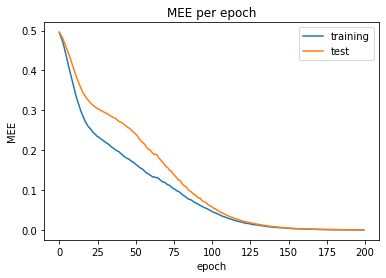

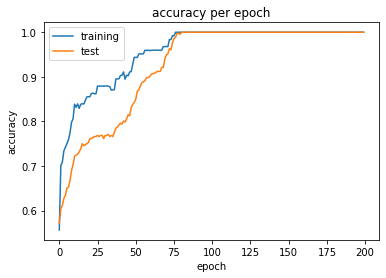

Test accuracy achieved: 1.0


In [13]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=25,
)

NN_MONK_solve(1, NN_HP)

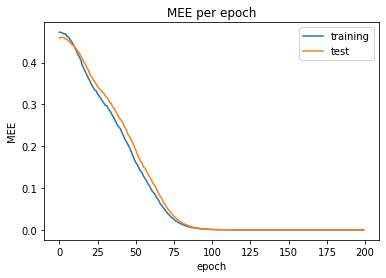

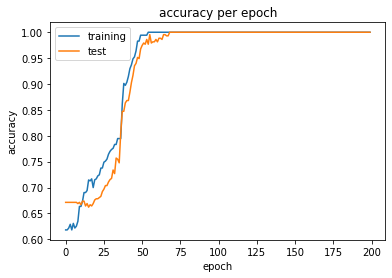

Test accuracy achieved: 1.0


In [14]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=25,
)

NN_MONK_solve(2, NN_HP)

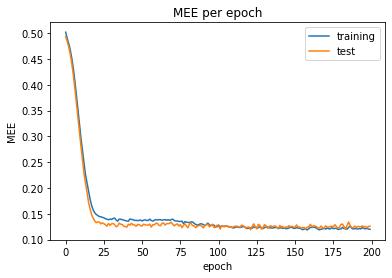

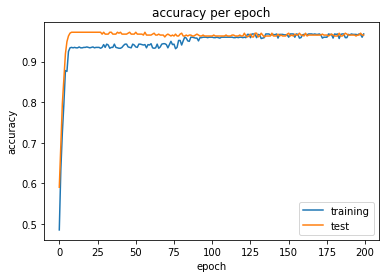

Test accuracy achieved: 0.9722222089767456


In [15]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0.003,
    mb_size=25,
)

NN_MONK_solve(3, NN_HP)